In [10]:
using IntervalArithmetic
using LaTeXStrings
using Plots

In [21]:
include("./heatmap/index.jl")
include("./method4/index.jl")
include("./intervalPCM/index.jl")
include("./twofoldInterval/index.jl")
include("./twofoldIntervalPCM/index.jl")

print()

In [22]:
function laTeXMatrix(
        pattern,
        size::Tuple{Integer, Integer})::String
    m, n = size

    mat = "\\begin{bmatrix}"
    for i = 1:m, j = 1:n
        mat *= pattern(i, j)
        if j == n
            if i != m
                mat *= " \\\\ "
            end
        else
            mat *= " & "
        end
    end
    mat *= "\\end{bmatrix}"

    return mat
end

laTeXMatrix (generic function with 1 method)

In [23]:
function simmean(A::Matrix{T})::T where {T <: Real}
    m, n = size(A)

    if m != n return 0 end
    if n == 1 return 0 end

    a = 0
    for i = 1:m, j = 1:n
        if i == j continue end
        a += A[i,j]
    end

    return a / n / (n-1)
end

simmean (generic function with 1 method)

In [34]:
function method4(A₁::Matrix{Interval{T}}, A₂::Matrix{Interval{T}}) where {T <: Real}
    _, n = size(A₁)

    results = solveApproximationLP_m4.([A₁, A₂])


    Ã₁⁻, Ã₁⁺ = twofoldIntervalMatrix2intervalMatrices(tildeA(results[1]))
    Ã₂⁻, Ã₂⁺ = twofoldIntervalMatrix2intervalMatrices(tildeA(results[2]))
    println("\\tilde{A}_1 = $(twofoldIntervalMatrixLaTeXString(tildeA(results[1])))"); println()
    println("\\tilde{A}_2 = $(twofoldIntervalMatrixLaTeXString(tildeA(results[2])))"); println()
    title⁻ = L"{\rm Sim}( A_{1ij}, \mathscr{A}_{ij}^- )"
    title⁺ = L"{\rm Sim}( A_{1ij}, \mathscr{A}_{ij}^+ )"

    heatmap₁⁻, indices₁⁻ = plotConincidenceIndices(A₁, Ã₁⁻, L"{\rm Sim}( A_{1ij}, \tilde{A}_{1ij}^- )")
    heatmap₁⁺, indices₁⁺ = plotConincidenceIndices(A₁, Ã₁⁺, L"{\rm Sim}( A_{1ij}, \tilde{A}_{1ij}^+ )")
    heatmap₂⁻, indices₂⁻ = plotConincidenceIndices(A₂, Ã₂⁻, L"{\rm Sim}( A_{2ij}, \tilde{A}_{2ij}^- )")
    heatmap₂⁺, indices₂⁺ = plotConincidenceIndices(A₂, Ã₂⁺, L"{\rm Sim}( A_{2ij}, \tilde{A}_{2ij}^+ )")

    display(plot([heatmap₁⁻, heatmap₁⁺, heatmap₂⁻, heatmap₂⁺]..., layout=(1, 4), size=(1500, 375)))

    μ₁⁻ = simmean(indices₁⁻); μ₁⁺ = simmean(indices₁⁺)
    μ₂⁻ = simmean(indices₂⁻); μ₂⁺ = simmean(indices₂⁺)
    display(L"\mu_{\rm Sim}(A_1, \tilde{A}_{1ij}^-) = %$(round(μ₁⁻, digits=3))")
    display(L"\mu_{\rm Sim}(A_1, \tilde{A}_{1ij}^+) = %$(round(μ₁⁺, digits=3))")
    display(L"\mu_{\rm Sim}(A_2, \tilde{A}_{2ij}^-) = %$(round(μ₂⁻, digits=3))")
    display(L"\mu_{\rm Sim}(A_2, \tilde{A}_{2ij}^+) = %$(round(μ₂⁺, digits=3))")


    A = generateTwofoldIntervalMatrix_m4(results)
    println("A = $(twofoldIntervalMatrixLaTeXString(A))"); println()

    result = solveCancellingLP_m4(A)
    resultₛₜᵣ = cancellingLPResultLaTeXString_m4(result)
    println("W = $(resultₛₜᵣ.W)"); println()
    println("""
        $(laTeXMatrix((i,j) -> "w_$i^{\\text{L}-}", (n, 1))) = $(resultₛₜᵣ.wᴸ⁻), ~~
        $(laTeXMatrix((i,j) -> "w_$i^{\\text{U}-}", (n, 1))) = $(resultₛₜᵣ.wᵁ⁻), ~~
        $(laTeXMatrix((i,j) -> "w_$i^{\\text{L}+}", (n, 1))) = $(resultₛₜᵣ.wᴸ⁺), ~~
        $(laTeXMatrix((i,j) -> "w_$i^{\\text{U}+}", (n, 1))) = $(resultₛₜᵣ.wᵁ⁺)
        """); println()
    println("""
        $(laTeXMatrix((i,j) -> "\\varepsilon_$i^\\text{L}", (n, 1))) = $(resultₛₜᵣ.εᴸ), ~~
        $(laTeXMatrix((i,j) -> "\\varepsilon_$i^\\text{U}", (n, 1))) = $(resultₛₜᵣ.εᵁ)
        """); println()

    Â = updatePCM_m4(A, result)

    displayCancellingLPResultLaTeXString_m4(result)

    return Â
end

method4 (generic function with 1 method)

# example 1

A_1 = A_2 = \begin{bmatrix} \left[ 1.0, 1.0 \right] & \left[ 1.0, 2.0 \right] & \left[ 0.667, 1.333 \right] & \left[ 1.0, 1.333 \right] \\ \left[ 0.5, 1.0 \right] & \left[ 1.0, 1.0 \right] & \left[ 0.444, 1.0 \right] & \left[ 0.667, 1.0 \right] \\ \left[ 0.75, 1.5 \right] & \left[ 1.0, 2.25 \right] & \left[ 1.0, 1.0 \right] & \left[ 1.0, 1.5 \right] \\ \left[ 0.75, 1.0 \right] & \left[ 1.0, 1.5 \right] & \left[ 0.667, 1.0 \right] & \left[ 1.0, 1.0 \right] \end{bmatrix}

\tilde{A}_1 = \begin{bmatrix} \left[ 1.0, \left[ 1.0, 1.0 \right], 1.0 \right] & \left[ 1.0, \left[ 1.0, 2.0 \right], 2.0 \right] & \left[ 0.67, \left[ 0.67, 1.33 \right], 1.33 \right] & \left[ 1.0, \left[ 1.0, 1.33 \right], 1.33 \right] \\ \left[ 0.5, \left[ 0.5, 1.0 \right], 1.0 \right] & \left[ 1.0, \left[ 1.0, 1.0 \right], 1.0 \right] & \left[ 0.44, \left[ 0.44, 1.0 \right], 1.0 \right] & \left[ 0.67, \left[ 0.67, 1.0 \right], 1.0 \right] \\ \left[ 0.75, \left[ 0.75, 1.5 \right], 1.5 \right] & \left[ 1.0, \left[ 1.0

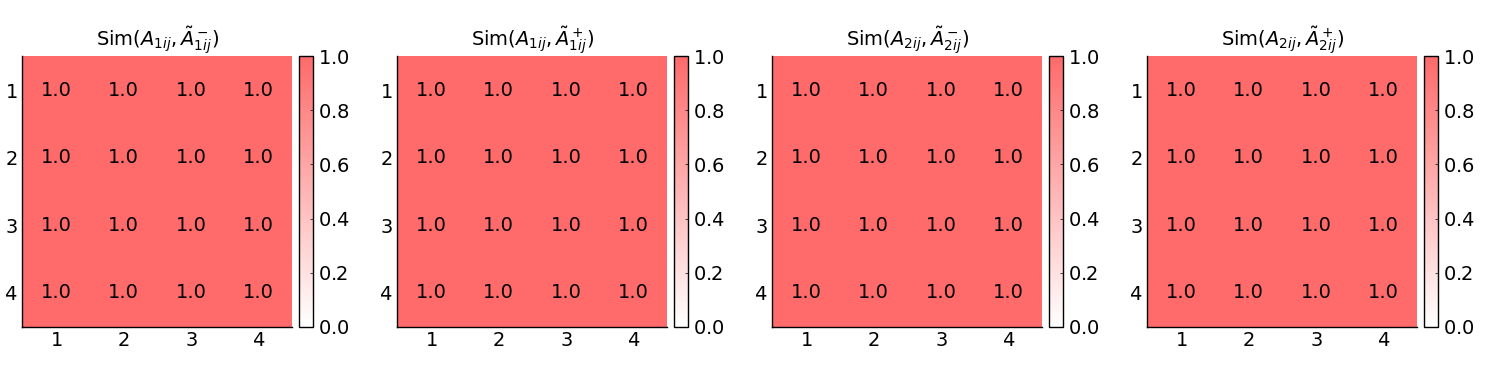

L"$\mu_{\rm Sim}(A_1, \tilde{A}_{1ij}^-) = 1.0$"

L"$\mu_{\rm Sim}(A_1, \tilde{A}_{1ij}^+) = 1.0$"

L"$\mu_{\rm Sim}(A_2, \tilde{A}_{2ij}^-) = 1.0$"

L"$\mu_{\rm Sim}(A_2, \tilde{A}_{2ij}^+) = 1.0$"



\tilde{A}_2 = \begin{bmatrix} \left[ 1.0, \left[ 1.0, 1.0 \right], 1.0 \right] & \left[ 1.0, \left[ 1.0, 2.0 \right], 2.0 \right] & \left[ 0.67, \left[ 0.67, 1.33 \right], 1.33 \right] & \left[ 1.0, \left[ 1.0, 1.33 \right], 1.33 \right] \\ \left[ 0.5, \left[ 0.5, 1.0 \right], 1.0 \right] & \left[ 1.0, \left[ 1.0, 1.0 \right], 1.0 \right] & \left[ 0.44, \left[ 0.44, 1.0 \right], 1.0 \right] & \left[ 0.67, \left[ 0.67, 1.0 \right], 1.0 \right] \\ \left[ 0.75, \left[ 0.75, 1.5 \right], 1.5 \right] & \left[ 1.0, \left[ 1.0, 2.25 \right], 2.25 \right] & \left[ 1.0, \left[ 1.0, 1.0 \right], 1.0 \right] & \left[ 1.0, \left[ 1.0, 1.5 \right], 1.5 \right] \\ \left[ 0.75, \left[ 0.75, 1.0 \right], 1.0 \right] & \left[ 1.0, \left[ 1.0, 1.5 \right], 1.5 \right] & \left[ 0.67, \left[ 0.67, 1.0 \right], 1.0 \right] & \left[ 1.0, \left[ 1.0, 1.0 \right], 1.0 \right] \end{bmatrix}

A = \begin{bmatrix} \left[ 1.0, \left[ 1.0, 1.0 \right], 1.0 \right] & \left[ 1.0, \left[ 1.0, 2.0 \right], 2.0 \right

L"$W = \begin{bmatrix}\left[ 0.235, 0.314 \right] \\ \left[ 0.157, 0.235 \right] \\ \left[ 0.235, 0.353 \right] \\ \left[ 0.235, 0.235 \right]\end{bmatrix}$"

L"$w^{\text{L}-} = \begin{bmatrix} 0.235  \\  0.157  \\  0.235  \\  0.235 \end{bmatrix}, ~~
w^{\text{U}-} = \begin{bmatrix} 0.314  \\  0.235  \\  0.353  \\  0.235 \end{bmatrix}, ~~
w^{\text{L}+} = \begin{bmatrix} 0.235  \\  0.157  \\  0.235  \\  0.235 \end{bmatrix}, ~~
w^{\text{U}+} = \begin{bmatrix} 0.314  \\  0.235  \\  0.353  \\  0.235 \end{bmatrix}
$"

L"$\varepsilon^\text{L} = \begin{bmatrix} 0.0  \\  0.0  \\  0.0  \\  0.0 \end{bmatrix}, ~~
\varepsilon^\text{U} = \begin{bmatrix} 0.0  \\  0.0  \\  0.0  \\  0.0 \end{bmatrix}
$"



W = \begin{bmatrix}\left[ 0.235, 0.314 \right] \\ \left[ 0.157, 0.235 \right] \\ \left[ 0.235, 0.353 \right] \\ \left[ 0.235, 0.235 \right]\end{bmatrix}

\begin{bmatrix}w_1^{\text{L}-} \\ w_2^{\text{L}-} \\ w_3^{\text{L}-} \\ w_4^{\text{L}-}\end{bmatrix} = \begin{bmatrix} 0.235  \\  0.157  \\  0.235  \\  0.235 \end{bmatrix}, ~~
\begin{bmatrix}w_1^{\text{U}-} \\ w_2^{\text{U}-} \\ w_3^{\text{U}-} \\ w_4^{\text{U}-}\end{bmatrix} = \begin{bmatrix} 0.314  \\  0.235  \\  0.353  \\  0.235 \end{bmatrix}, ~~
\begin{bmatrix}w_1^{\text{L}+} \\ w_2^{\text{L}+} \\ w_3^{\text{L}+} \\ w_4^{\text{L}+}\end{bmatrix} = \begin{bmatrix} 0.235  \\  0.157  \\  0.235  \\  0.235 \end{bmatrix}, ~~
\begin{bmatrix}w_1^{\text{U}+} \\ w_2^{\text{U}+} \\ w_3^{\text{U}+} \\ w_4^{\text{U}+}\end{bmatrix} = \begin{bmatrix} 0.314  \\  0.235  \\  0.353  \\  0.235 \end{bmatrix}


\begin{bmatrix}\varepsilon_1^\text{L} \\ \varepsilon_2^\text{L} \\ \varepsilon_3^\text{L} \\ \varepsilon_4^\text{L}\end{bmatrix} = \begin{bmat

In [35]:
A₁ = [
    1..1 1..2 (2/3)..(4/3) 1..(4/3)
    (1/2)..1 1..1 (4/9)..1 (2/3)..1
    (3/4)..(3/2) 1..(9/4) 1..1 1..(3/2)
    (3/4)..1 1..(3/2) (2/3)..1 1..1
]
A₂ = A₁

println("A_1 = A_2 = $(intervalMatrixLaTeXString(A₁))"); println()

Â = method4(A₁, A₂)

println("\\mathscr{A}^4 = $(twofoldIntervalMatrixLaTeXString(Â))")

# example 2

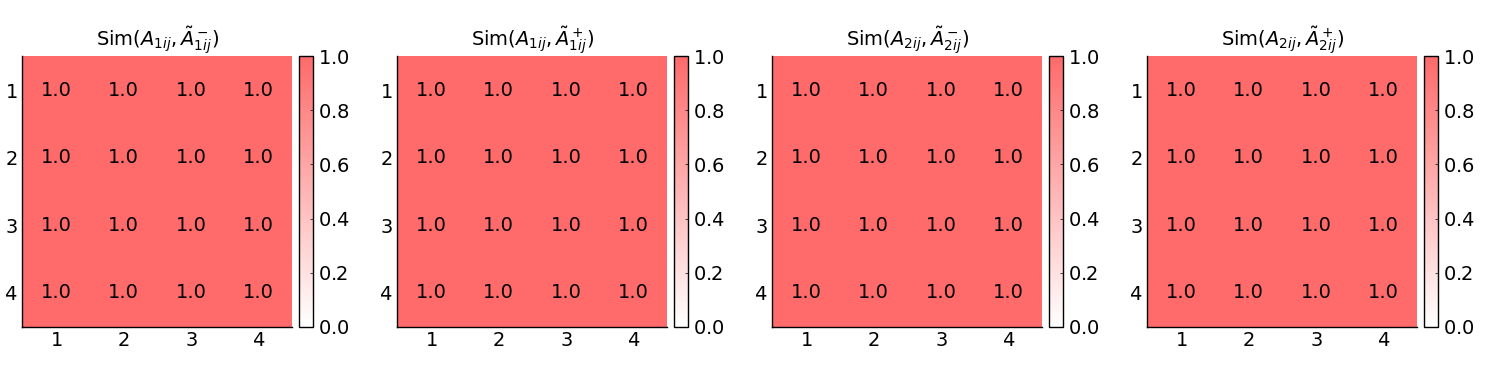

L"$\mu_{\rm Sim}(A_1, \tilde{A}_{1ij}^-) = 1.0$"

L"$\mu_{\rm Sim}(A_1, \tilde{A}_{1ij}^+) = 1.0$"

L"$\mu_{\rm Sim}(A_2, \tilde{A}_{2ij}^-) = 1.0$"

L"$\mu_{\rm Sim}(A_2, \tilde{A}_{2ij}^+) = 1.0$"

\tilde{A}_1 = \begin{bmatrix} \left[ 1.0, \left[ 1.0, 1.0 \right], 1.0 \right] & \left[ 1.0, \left[ 1.0, 2.0 \right], 2.0 \right] & \left[ 0.67, \left[ 0.67, 1.33 \right], 1.33 \right] & \left[ 1.0, \left[ 1.0, 1.33 \right], 1.33 \right] \\ \left[ 0.5, \left[ 0.5, 1.0 \right], 1.0 \right] & \left[ 1.0, \left[ 1.0, 1.0 \right], 1.0 \right] & \left[ 0.44, \left[ 0.44, 1.0 \right], 1.0 \right] & \left[ 0.67, \left[ 0.67, 1.0 \right], 1.0 \right] \\ \left[ 0.75, \left[ 0.75, 1.5 \right], 1.5 \right] & \left[ 1.0, \left[ 1.0, 2.25 \right], 2.25 \right] & \left[ 1.0, \left[ 1.0, 1.0 \right], 1.0 \right] & \left[ 1.0, \left[ 1.0, 1.5 \right], 1.5 \right] \\ \left[ 0.75, \left[ 0.75, 1.0 \right], 1.0 \right] & \left[ 1.0, \left[ 1.0, 1.5 \right], 1.5 \right] & \left[ 0.67, \left[ 0.67, 1.0 \right], 1.0 \right] & \left[ 1.0, \left[ 1.0, 1.0 \right], 1.0 \right] \end{bmatrix}

\tilde{A}_2 = \begin{bmatrix} \left[ 1.0, \left[ 1.0, 1.0 \right], 1.0 \right] & \left[ 0.8, \left[ 0.8, 2.5 \right], 2.

L"$W = \begin{bmatrix}\left[ 0.206, 0.343 \right] \\ \left[ 0.137, 0.258 \right] \\ \left[ 0.206, 0.386 \right] \\ \left[ 0.206, 0.258 \right]\end{bmatrix}$"

L"$w^{\text{L}-} = \begin{bmatrix} 0.206  \\  0.137  \\  0.206  \\  0.206 \end{bmatrix}, ~~
w^{\text{U}-} = \begin{bmatrix} 0.275  \\  0.206  \\  0.309  \\  0.206 \end{bmatrix}, ~~
w^{\text{L}+} = \begin{bmatrix} 0.206  \\  0.137  \\  0.206  \\  0.206 \end{bmatrix}, ~~
w^{\text{U}+} = \begin{bmatrix} 0.275  \\  0.206  \\  0.309  \\  0.206 \end{bmatrix}
$"

L"$\varepsilon^\text{L} = \begin{bmatrix} 0.0  \\  0.0  \\  0.0  \\  0.0 \end{bmatrix}, ~~
\varepsilon^\text{U} = \begin{bmatrix} 0.0  \\  0.0  \\  0.0  \\  0.0 \end{bmatrix}
$"

A = \begin{bmatrix} \left[ 1.0, \left[ 1.0, 1.0 \right], 1.0 \right] & \left[ 0.8, \left[ 1.0, 2.0 \right], 2.5 \right] & \left[ 0.53, \left[ 0.67, 1.33 \right], 1.67 \right] & \left[ 0.8, \left[ 1.0, 1.33 \right], 1.67 \right] \\ \left[ 0.4, \left[ 0.5, 1.0 \right], 1.25 \right] & \left[ 1.0, \left[ 1.0, 1.0 \right], 1.0 \right] & \left[ 0.36, \left[ 0.44, 1.0 \right], 1.25 \right] & \left[ 0.53, \left[ 0.67, 1.0 \right], 1.25 \right] \\ \left[ 0.6, \left[ 0.75, 1.5 \right], 1.88 \right] & \left[ 0.8, \left[ 1.0, 2.25 \right], 2.81 \right] & \left[ 1.0, \left[ 1.0, 1.0 \right], 1.0 \right] & \left[ 0.8, \left[ 1.0, 1.5 \right], 1.88 \right] \\ \left[ 0.6, \left[ 0.75, 1.0 \right], 1.25 \right] & \left[ 0.8, \left[ 1.0, 1.5 \right], 1.87 \right] & \left[ 0.53, \left[ 0.67, 1.0 \right], 1.25 \right] & \left[ 1.0, \left[ 1.0, 1.0 \right], 1.0 \right] \end{bmatrix}

W = \begin{bmatrix}\left[ 0.206, 0.343 \right] \\ \left[ 0.137, 0.258 \right] \\ \left[ 0.206, 0.386 \right] \\ \left[ 0.206

In [36]:
A₁ = [
    1..1 1..2 (2/3)..(4/3) 1..(4/3)
    (1/2)..1 1..1 (4/9)..1 (2/3)..1
    (3/4)..(3/2) 1..(9/4) 1..1 1..(3/2)
    (3/4)..1 1..(3/2) (2/3)..1 1..1
]
_, n = size(A₁)
A₂ = fill(1..1, (n, n))
for i = 1:n, j = 1:n
    if i == j continue end
    A₂[i,j] = (A₁[i,j].lo * 4/5)..(A₁[i,j].hi * 5/4)
end

Â = method4(A₁, A₂)

println("\\mathscr{A}^4 = $(twofoldIntervalMatrixLaTeXString(Â))")

<!-- ともに弱い整合性を持ち， $A_{1ij} \subseteq A_{2ij}$

```
A₁ = [
    1..1 2..5 2..4 2..3
    (1/5)..(1/2) 1..1 (1/5)..4 (1/5)..3
    (1/4)..(1/2) (1/4)..5 1..1 (1/4)..3
    (1/3)..(1/2) (1/3)..5 (1/3)..4 1..1
]
A₂ = fill(1..1, size(A₁))
_, n = size(A₁)
for i = 1:n, j = 1:n
    if i == j continue end
    A₂[i,j] = (A₁[i,j].lo * 1/1.1)..(A₁[i,j].hi * 1.1)
end

display(L"A_1 = %$(intervalMatrixLaTeXString(A₁))")
display(L"A_2 = %$(intervalMatrixLaTeXString(A₂))")

display(isConsistentIntervalPCM(A₁))
display(isWeaklyConsistentIntervalPCM(A₁))
display(isConsistentIntervalPCM(A₂))
display(isWeaklyConsistentIntervalPCM(A₂))

plotAll(A₁, A₂)
``` -->

# example 3

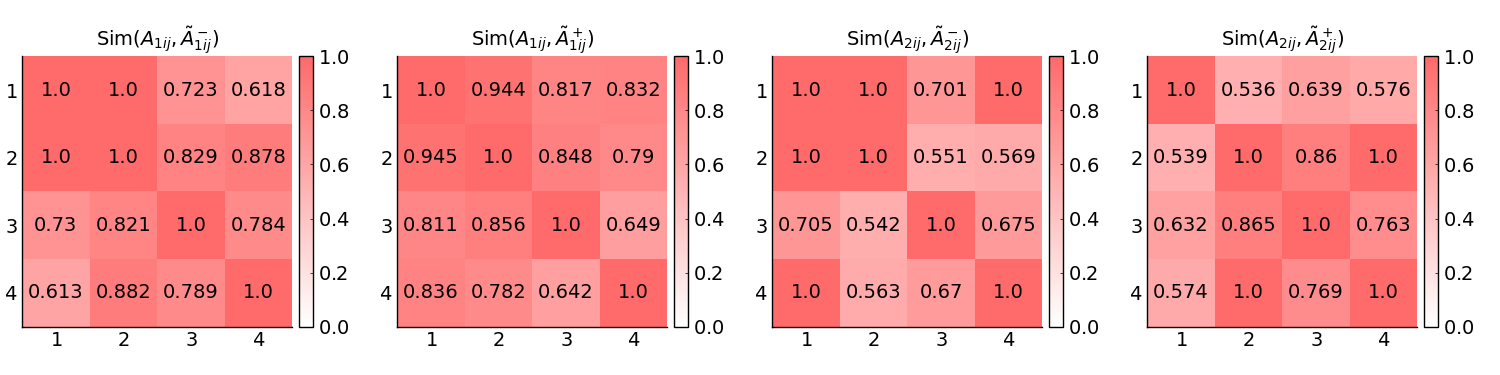

L"$\mu_{\rm Sim}(A_1, \tilde{A}_{1ij}^-) = 0.806$"

L"$\mu_{\rm Sim}(A_1, \tilde{A}_{1ij}^+) = 0.813$"

L"$\mu_{\rm Sim}(A_2, \tilde{A}_{2ij}^-) = 0.748$"

L"$\mu_{\rm Sim}(A_2, \tilde{A}_{2ij}^+) = 0.729$"

\tilde{A}_1 = \begin{bmatrix} \left[ 1.0, \left[ 1.0, 1.0 \right], 1.0 \right] & \left[ 1.98, \left[ 1.98, 2.03 \right], 2.04 \right] & \left[ 3.94, \left[ 3.97, 4.07 \right], 4.11 \right] & \left[ 3.96, \left[ 3.99, 4.05 \right], 4.07 \right] \\ \left[ 0.49, \left[ 0.49, 0.5 \right], 0.5 \right] & \left[ 1.0, \left[ 1.0, 1.0 \right], 1.0 \right] & \left[ 1.94, \left[ 1.96, 2.05 \right], 2.07 \right] & \left[ 1.95, \left[ 1.97, 2.04 \right], 2.05 \right] \\ \left[ 0.24, \left[ 0.25, 0.25 \right], 0.25 \right] & \left[ 0.48, \left[ 0.49, 0.51 \right], 0.51 \right] & \left[ 1.0, \left[ 1.0, 1.0 \right], 1.0 \right] & \left[ 0.97, \left[ 0.98, 1.01 \right], 1.03 \right] \\ \left[ 0.25, \left[ 0.25, 0.25 \right], 0.25 \right] & \left[ 0.49, \left[ 0.49, 0.51 \right], 0.51 \right] & \left[ 0.97, \left[ 0.99, 1.02 \right], 1.03 \right] & \left[ 1.0, \left[ 1.0, 1.0 \right], 1.0 \right] \end{bmatrix}

\tilde{A}_2 = \begin{bmatrix} \left[ 1.0, \left[ 1.0, 1.0 \right], 1.0 \right] & \left[ 2.0,

L"$W = \begin{bmatrix}\left[ 0.5, 0.501 \right] \\ \left[ 0.247, 0.251 \right] \\ \left[ 0.123, 0.127 \right] \\ \left[ 0.123, 0.126 \right]\end{bmatrix}$"

L"$w^{\text{L}-} = \begin{bmatrix} 0.5  \\  0.247  \\  0.123  \\  0.123 \end{bmatrix}, ~~
w^{\text{U}-} = \begin{bmatrix} 0.5  \\  0.251  \\  0.126  \\  0.126 \end{bmatrix}, ~~
w^{\text{L}+} = \begin{bmatrix} 0.5  \\  0.247  \\  0.123  \\  0.123 \end{bmatrix}, ~~
w^{\text{U}+} = \begin{bmatrix} 0.5  \\  0.251  \\  0.126  \\  0.126 \end{bmatrix}
$"

L"$\varepsilon^\text{L} = \begin{bmatrix} 0.0  \\  0.0  \\  0.0  \\  0.0 \end{bmatrix}, ~~
\varepsilon^\text{U} = \begin{bmatrix} 0.0  \\  0.0  \\  0.0  \\  0.0 \end{bmatrix}
$"

A = \begin{bmatrix} \left[ 1.0, \left[ 1.0, 1.0 \right], 1.0 \right] & \left[ 1.98, \left[ 2.0, 2.02 \right], 2.03 \right] & \left[ 3.94, \left[ 3.97, 4.05 \right], 4.07 \right] & \left[ 3.96, \left[ 3.96, 4.05 \right], 4.06 \right] \\ \left[ 0.49, \left[ 0.49, 0.5 \right], 0.5 \right] & \left[ 1.0, \left[ 1.0, 1.0 \right], 1.0 \right] & \left[ 1.95, \left[ 1.96, 2.03 \right], 2.05 \right] & \left[ 1.95, \left[ 1.97, 2.03 \right], 2.04 \right] \\ \left[ 0.25, \left[ 0.25, 0.25 \right], 0.25 \right] & \left[ 0.49, \left[ 0.49, 0.51 \right], 0.51 \right] & \left[ 1.0, \left[ 1.0, 1.0 \right], 1.0 \right] & \left[ 0.97, \left[ 0.98, 1.02 \right], 1.03 \right] \\ \left[ 0.25, \left[ 0.25, 0.25 \right], 0.25 \right] & \left[ 0.49, \left[ 0.49, 0.51 \right], 0.51 \right] & \left[ 0.97, \left[ 0.98, 1.02 \right], 1.03 \right] & \left[ 1.0, \left[ 1.0, 1.0 \right], 1.0 \right] \end{bmatrix}

W = \begin{bmatrix}\left[ 0.5, 0.501 \right] \\ \left[ 0.247, 0.251 \right] \\ \left[ 0.123, 0.127 \rig

In [37]:
A = [
    1 2 4 4
    1/2 1 2 2
    1/4 1/2 1 1
    1/4 1/2 1 1
]

A₁ = randamizedIntervalPCM(A, 1234, 3e-2)
A₂ = randamizedIntervalPCM(A, 134, 3e-2)

Â = method4(A₁, A₂)

println("\\mathscr{A}^4 = $(twofoldIntervalMatrixLaTeXString(Â))")

# example 4

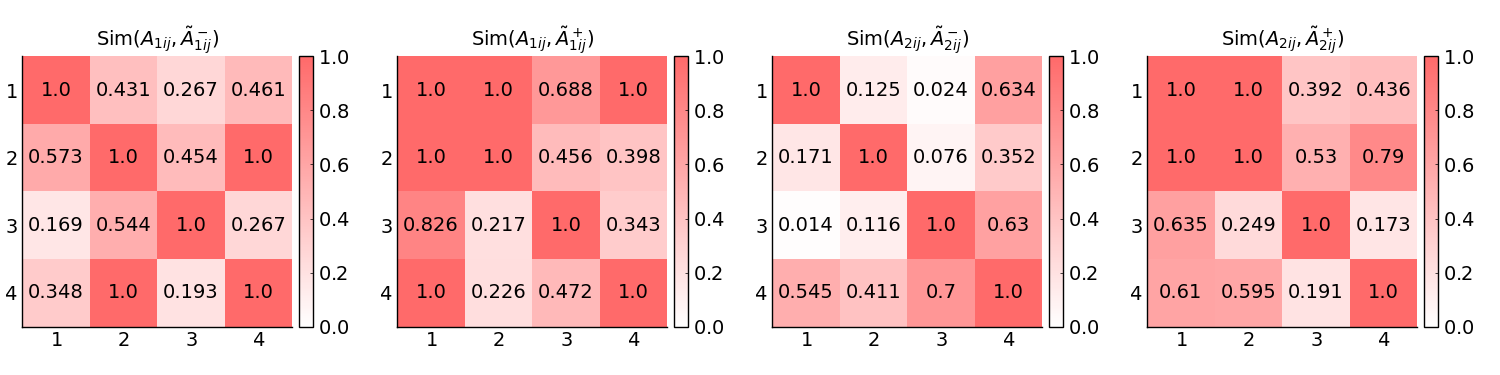

L"$\mu_{\rm Sim}(A_1, \tilde{A}_{1ij}^-) = 0.476$"

L"$\mu_{\rm Sim}(A_1, \tilde{A}_{1ij}^+) = 0.636$"

L"$\mu_{\rm Sim}(A_2, \tilde{A}_{2ij}^-) = 0.317$"

L"$\mu_{\rm Sim}(A_2, \tilde{A}_{2ij}^+) = 0.55$"

\tilde{A}_1 = \begin{bmatrix} \left[ 1.0, \left[ 1.0, 1.0 \right], 1.0 \right] & \left[ 1.41, \left[ 1.41, 1.88 \right], 2.5 \right] & \left[ 2.25, \left[ 3.56, 4.04 \right], 4.85 \right] & \left[ 8.14, \left[ 10.88, 13.34 \right], 13.47 \right] \\ \left[ 0.4, \left[ 0.53, 0.71 \right], 0.71 \right] & \left[ 1.0, \left[ 1.0, 1.0 \right], 1.0 \right] & \left[ 1.01, \left[ 2.12, 2.55 \right], 3.06 \right] & \left[ 3.65, \left[ 6.48, 8.4 \right], 8.48 \right] \\ \left[ 0.21, \left[ 0.25, 0.28 \right], 0.44 \right] & \left[ 0.33, \left[ 0.39, 0.47 \right], 0.99 \right] & \left[ 1.0, \left[ 1.0, 1.0 \right], 1.0 \right] & \left[ 1.88, \left[ 3.02, 3.34 \right], 5.33 \right] \\ \left[ 0.07, \left[ 0.07, 0.09 \right], 0.12 \right] & \left[ 0.12, \left[ 0.12, 0.15 \right], 0.27 \right] & \left[ 0.19, \left[ 0.3, 0.33 \right], 0.53 \right] & \left[ 1.0, \left[ 1.0, 1.0 \right], 1.0 \right] \end{bmatrix}

\tilde{A}_2 = \begin{bmatrix} \left[ 1.0, \left[ 1.0, 1.0 \right], 1.0 \right] & \left[ 1.5

L"$W = \begin{bmatrix}\left[ 0.467, 0.517 \right] \\ \left[ 0.274, 0.326 \right] \\ \left[ 0.127, 0.205 \right] \\ \left[ 0.038, 0.046 \right]\end{bmatrix}$"

L"$w^{\text{L}-} = \begin{bmatrix} 0.461  \\  0.232  \\  0.107  \\  0.038 \end{bmatrix}, ~~
w^{\text{U}-} = \begin{bmatrix} 0.517  \\  0.323  \\  0.131  \\  0.046 \end{bmatrix}, ~~
w^{\text{L}+} = \begin{bmatrix} 0.461  \\  0.232  \\  0.107  \\  0.038 \end{bmatrix}, ~~
w^{\text{U}+} = \begin{bmatrix} 0.517  \\  0.323  \\  0.131  \\  0.046 \end{bmatrix}
$"

L"$\varepsilon^\text{L} = \begin{bmatrix} 0.0  \\  0.0  \\  0.0  \\  0.0 \end{bmatrix}, ~~
\varepsilon^\text{U} = \begin{bmatrix} 0.0  \\  0.0  \\  0.0  \\  0.0 \end{bmatrix}
$"

A = \begin{bmatrix} \left[ 1.0, \left[ 1.0, 1.0 \right], 1.0 \right] & \left[ 1.41, \left[ 1.55, 1.88 \right], 2.23 \right] & \left[ 2.25, \left[ 3.56, 4.04 \right], 4.85 \right] & \left[ 8.75, \left[ 10.17, 13.34 \right], 13.47 \right] \\ \left[ 0.45, \left[ 0.53, 0.65 \right], 0.71 \right] & \left[ 1.0, \left[ 1.0, 1.0 \right], 1.0 \right] & \left[ 1.07, \left[ 2.12, 2.55 \right], 3.06 \right] & \left[ 4.19, \left[ 6.29, 8.4 \right], 8.48 \right] \\ \left[ 0.21, \left[ 0.25, 0.28 \right], 0.44 \right] & \left[ 0.33, \left[ 0.39, 0.47 \right], 0.93 \right] & \left[ 1.0, \left[ 1.0, 1.0 \right], 1.0 \right] & \left[ 1.88, \left[ 2.76, 3.4 \right], 5.33 \right] \\ \left[ 0.07, \left[ 0.07, 0.1 \right], 0.11 \right] & \left[ 0.12, \left[ 0.12, 0.16 \right], 0.24 \right] & \left[ 0.19, \left[ 0.29, 0.36 \right], 0.53 \right] & \left[ 1.0, \left[ 1.0, 1.0 \right], 1.0 \right] \end{bmatrix}

W = \begin{bmatrix}\left[ 0.467, 0.517 \right] \\ \left[ 0.274, 0.326 \right] \\ \left[ 0.127, 0.205

In [38]:
A = [
    1 2 3 10
    1/2 1 3 8
    1/3 1/3 1 3
    1/10 1/8 1/3 1
]

A₁ = randamizedIntervalPCM(A, 124, 4e-1)
A₂ = randamizedIntervalPCM(A, 411, 4e-1)

Â = method4(A₁, A₂)

println("\\mathscr{A}^4 = $(twofoldIntervalMatrixLaTeXString(Â))")